## Exercise 1 - vectors and data frames

In [1]:
library(htmltab)
library("tidyverse")

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# tramite questa libreria sono in grado di scaricare una tabella da un url e convertirla direttamente in un dataframe
# ciò che ottengo però sono series di chr type elements dovrò pertanto convertirli in tipi numerici

scottish.lakes <- htmltab("https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland",1)
names <- list("Loch","Volume","Area","Length","Max.depth","Mean depth")
for (i in (1:length(names))){
    colnames(scottish.lakes)[i] <- names[i]
}

scottish.lakes

,Loch,Volume,Area,Length,Max.depth,Mean depth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,Loch Ness,7.45,56,39,230,132
3,Loch Lomond,2.6,71,36,190,37
4,Loch Morar,2.3,27,18.8,310,87
5,Loch Tay,1.6,26.4,23,150,60.6
6,Loch Awe,1.2,39,41,94,32
7,Loch Maree,1.09,28.6,20,114,38
8,Loch Ericht,1.08,18.6,23,156,57.6
9,Loch Lochy,1.07,16,16,162,70
10,Loch Rannoch,0.97,19,15.7,134,51


In [3]:
# tramite la funzione sapply chiedo al dataframe quale sia la classe delle colonne 
# il problema adesso è che ho dei char e non dei tipi numerici perchè di default nelle tabelle di wikipedia 
# viene usato come separatore per ogni valore il "tab" che rende char ciò che dovrebbe essere un numero 
 
sapply(scottish.lakes, class)

Loch      Volume        Area      Length   Max.depth  Mean depth 
"character" "character" "character" "character" "character" "character"

In [4]:
# in questo modo cambio il tipo di ogni colonna in dbl tranne la prima ([-1]) utilizzando una logical mask

scottish.lakes[names(scottish.lakes)[-1]] <- sapply(scottish.lakes[names(scottish.lakes)[-1]], as.numeric)
scottish.lakes["Max.depth"] <- sapply(scottish.lakes["Max.depth"], as.integer)

# inoltre poichè la colonna max.depth è costituita soltanto da interi la casto ad int
scottish.lakes

,Loch,Volume,Area,Length,Max.depth,Mean depth
,<chr>,<dbl>,<dbl>,<dbl>,"<int[,1]>",<dbl>
2,Loch Ness,7.45,56.0,39.0,230,132.0
3,Loch Lomond,2.60,71.0,36.0,190,37.0
4,Loch Morar,2.30,27.0,18.8,310,87.0
5,Loch Tay,1.60,26.4,23.0,150,60.6
6,Loch Awe,1.20,39.0,41.0,94,32.0
7,Loch Maree,1.09,28.6,20.0,114,38.0
8,Loch Ericht,1.08,18.6,23.0,156,57.6
9,Loch Lochy,1.07,16.0,16.0,162,70.0
10,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [5]:
# poichè la funzione paste trasforma ciò che le viene dato in string character e la funzione print stampa a schermo soltanto le stringhe 
# utilizzo insieme le due per stampare quali siano l'area e il volume più grande dei laghi nel dataframe

print(paste0("The minimum and maximum area are ",min(scottish.lakes["Area"]), " km^2 and ",max(scottish.lakes["Area"]), " km^2"))
print(paste0("The minimum and maximum volume are ",min(scottish.lakes["Volume"]), " km^3 and ",max(scottish.lakes["Volume"]), " km^3"))

[1] "The minimum and maximum area are 12.4 km^2 and 71 km^2"
[1] "The minimum and maximum volume are 0.35 km^3 and 7.45 km^3"


In [6]:
# utilizzo la funzione order che come argomento di un dataframe fa in modo che questo si riorganizzi ordinando in modo ascendente 
# o discendente (in base al segno dell'argomento di order ad esempio) una colonna ben precisa in questo caso scottish.lakes$Area

scottish.lakes <- scottish.lakes[order(-scottish.lakes$Area),]
print(paste0("The two largest area lakes in the table are ",scottish.lakes$Area[1]," km^2 and ",scottish.lakes$Area[2]," km^2"))


[1] "The two largest area lakes in the table are 71 km^2 and 56 km^2"


In [7]:
print(paste0("The total area covered by all lakes is ",sum(scottish.lakes$Area)," km^2"))

[1] "The total area covered by all lakes is 372 km^2"


## Exercise 2 - Crude Oil Production

In [8]:
# il file csv da importare, se aperto con un editor di testo permette di osservare che il separator utilizzato è la virgola

url <- "https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download"
oildf <- read.csv(url, skip=1) # skip uguale a uno serve per saltare nella memorizzazione del dataframe la prima riga 

# dall'ultima parola del link del csv di google drive si deduce che si possiedono soltanto i permessi di vedere il file e non modificarlo
# allora per usare read.csv è necessario un url che inidirizzi direttamente al file oppure al download dello stesso. Cambiando /view 
# in $export=download si fa in modo che R legga direttamente il csv file scaricandolo

head(oildf)

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


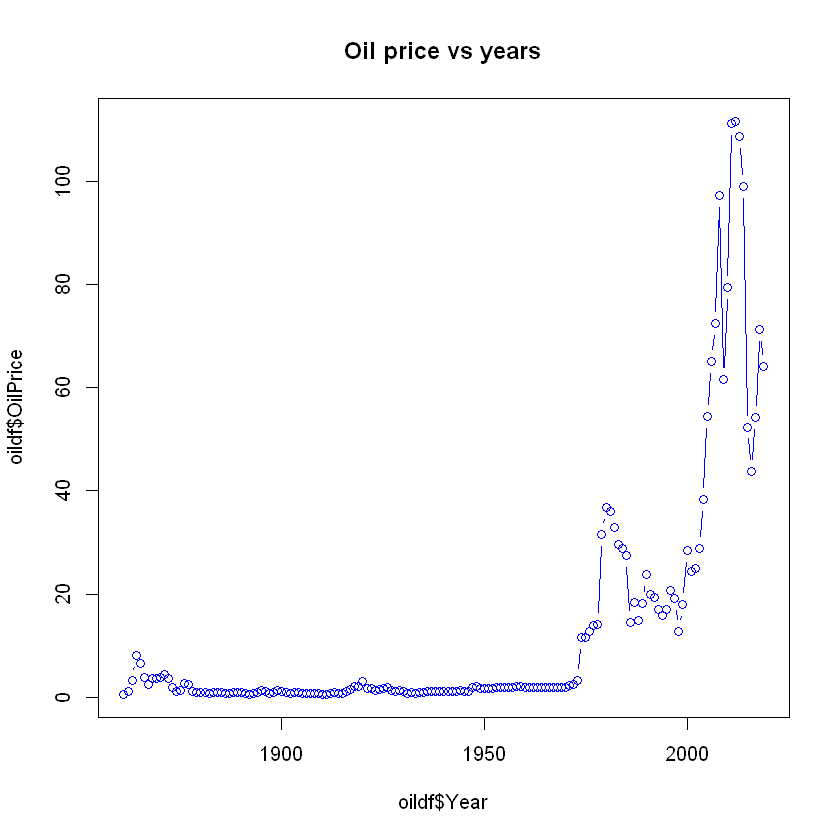

In [9]:
# per costruire un plot si utilizza la funzione plot
plot(oildf$Year,oildf$OilPrice, type="b", main="Oil price vs years", col="blue")

In [10]:
# per conoscere quale sia il prezzo più alto del petrolio che sia mai stato registrato utilizzo la funzione max e 
# which per cercare l'indice corrispondente al prezzo massimo

print(paste0("The year corresponding to the maximum oil price ",max(oildf$OilPrice)," is ",oildf$Year[which.max(oildf$OilPrice)]))

[1] "The year corresponding to the maximum oil price 111.669702380952 is 2012"


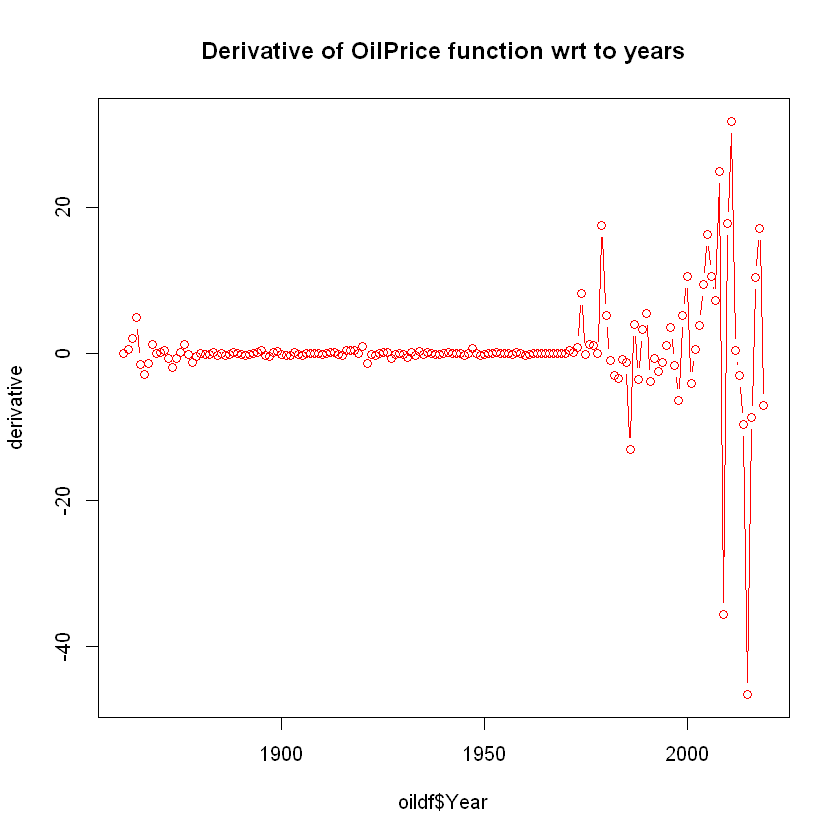

In [11]:
# per rappresentare la derivata numerica della funzione che descrive il prezzo del petrolio in funzione degli anni costruisco 
# un vettore di differenze a partire dalla colonna OilPrice del dataframe. Per definizione di derivata numerica dovrei dividere 
# ciascuna differenza per l'incremento dell'anno scelto come step che in questo caso è uno

derivative <- c(0,diff(oildf$OilPrice)) 
# aggiungo uno zero al vettore in modo che la sua lunghezza combaci con quella del vettore degli anni

plot(oildf$Year, derivative, main="Derivative of OilPrice function wrt to years", type="b", col="red")

## Exercise 3 - World Coal Production


In [12]:
# come nel precedente esercizio riscrivo l'url del csv che devo importare disponibile in view. Modifico 
# l'url in modo che dentro il notebook stesso R salvi il file e lo apra come csv memorizzandolo in un tibble

url <- "https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download"
coaldf <- read_csv(url)
head(coaldf)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


In [13]:
# adesso è necessario applicare dei filtri al tibble. Prima di tutto bisogna selezionare le diverse nazioni,
# per ciascuna attenzionare gli anni di produzione sucessivi al 1970. Infine bisogna costruire un bar plot
# nel quale di ciascuna nazione si misura la produzione di carbone dopo il 1970 

colnames(coaldf)[4] <- "Coal.production"
#names(coaldf)[4] <- "Coal.production"ù

# per rendere più semplice accedere all'ultima colonna in quanto inizialmente possedeva come caratteri 
# dei ticks ne cambio il nome, posso usare colnames() oppure names(). Le due funzioni differiscono dal
# tipo di argomento che accettano, la prima oggetti a due dimensioni mentre la seconda qualsiasi R object

In [14]:
coal.countries <- unique(coaldf$Entity)
# innanzitutto mi preparo per il bar plot avente come etichette le nazioni che producono carbone. 
# tramite unique ritrovo i nomi dei paesi che compaiono almeno una volta nella colonna entity

coaldf.countries <- coaldf %>% 
    filter(!is.na(Entity)) %>% 
    group_by(Entity) %>% 
    count()

head(coaldf.countries)
# mi accorgo che in realtà non serve nemmeno assergnare un vettore a parte per il numero di paesi 
# che compaiono nel dataframe. Come risultato di questo raggruppamento ottento un oggetto grouped_df

Entity,n
<chr>,<int>
Afghanistan,117
Africa,104
Albania,117
Algeria,65
American Samoa,37
Antigua and Barbuda,37


In [15]:
print(paste0("The number of unique countries is ",length(coal.countries)))

[1] "The number of unique countries is 200"


## Barplot
Adesso si può finalmente eseguire un barplot delle due colonne del dataframe ottenuto filtrando l'originale in funzione del numero di paesi che compaiono nei dati del tibble.

Ho trovato due modi per costruire il bar plot. Il primo utilizza esplicitamente il dataframe creato nella cella precedente mentre il secondo sfrutta come argomento di barplot una table. Table è un oggetto che se chiamato come funzione sul dataframe iniziale rispetto alla colonna "entity" restituisce direttamente la frequenza dei nomi dei paesi nel dataframe affiancati dal nome stesso.

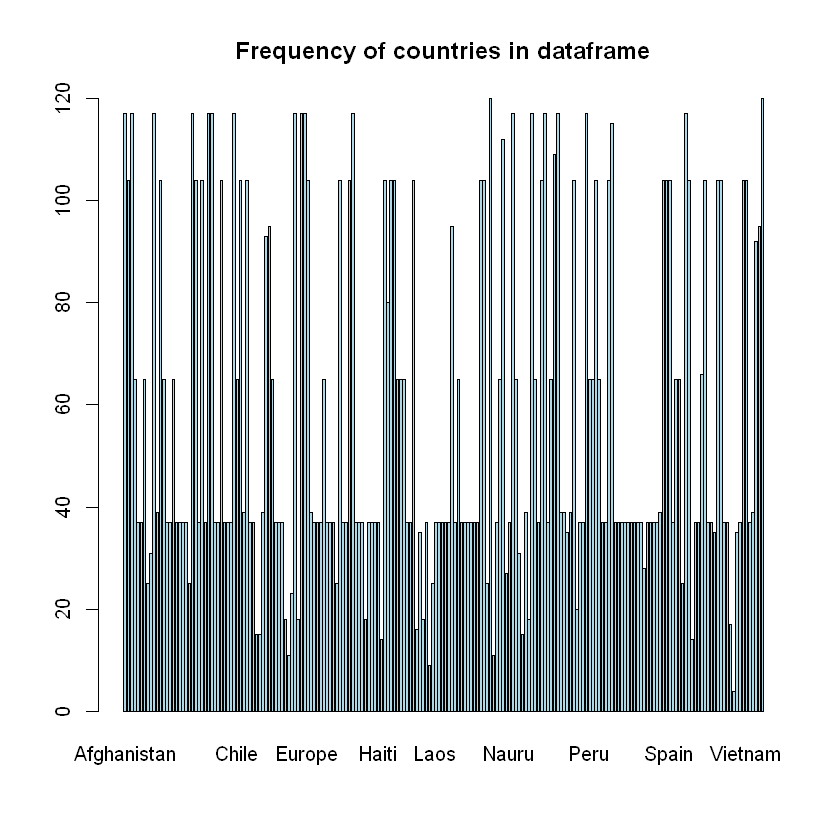

In [16]:
barplot(height = coaldf.countries$n, names = coaldf.countries$Entity, col = "lightblue")
title("Frequency of countries in dataframe")

Oppure utilizzando "table" si osserva:

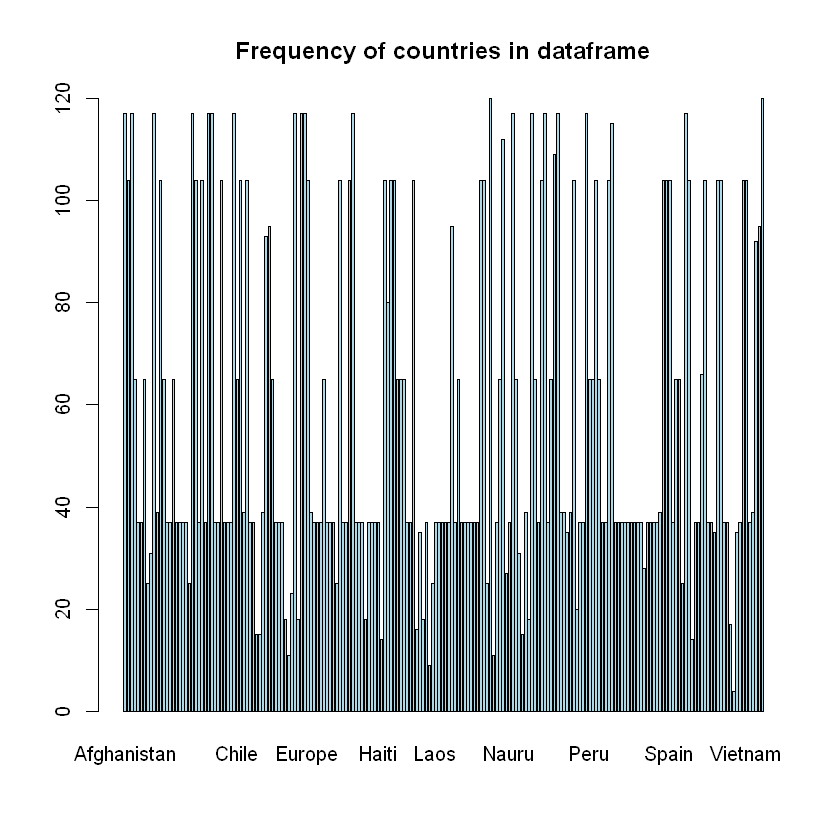

In [17]:
table.coal <- table(coaldf$Entity)
barplot(table.coal, col = "lightblue")
title("Frequency of countries in dataframe")

## Produzione di carbone per ciascun paese dal 1970

In [18]:
coaldf.year <- filter(coaldf, Year >= 1970)
# prima di contare la coal.production per ciascun paese filtro il tibble selezionando gli anni maggiori 
# o uguali di 1970

In [19]:
coalsumdf <- aggregate(coaldf.year$Coal.production, by = list(Entity = coaldf.year$Entity), FUN = sum)
# la funzione che meglio mi permette di raggruppare i dati per nazione e sommare direttamente per 
# ciascuno rispetto alla colonna coal.production è aggregate().
# Dalla documentazione si osservano come argomenti: il primo rappresenta il dataframe da utilizzare 
# rispetto a cui raggruppare i dati ed applicare row wise l'operazione nell'argomento FUN, il secondo "by"
# invece corrisponde a quello che in python era utilizzato come unico argomento del metodo groupby([])

In [20]:
ordered.nations <- coalsumdf[order(coalsumdf$x, decreasing = TRUE),]$Entity[2:6]
# la scrittura non è human readable dunque provo a spiegare cosa ho fatto in quest espressione da sinistra 
# verso destra:
# assegno i nomi delle nazioni ad un vettore di characters. Per trovare quali sono i primi cinque paesi nel 
# mondo a produrre carbone: seleziono all'interno del dataframe, tramite la funzione order applicata sulla 
# colonna x restituendo un ordine decrescente, gli indici delle nazioni produttrici di carbone dalla 
# "migliore" alla "peggiore". La prima riga del dataframe corrisponde alla nazione "world" pertanto quando 
# seleziono in $entity le righe da salvare nel vettore di chr parto dall'indice 2 fino al 6.

print(c("The five best countries that produce coal are ", ordered.nations))

[1] "The five best countries that produce coal are "
[2] "Asia Pacific"                                  
[3] "Asia and Oceania"                              
[4] "China"                                         
[5] "OECD"                                          
[6] "North America"                                 


Adesso bisogna rappresentare la produzione di carbone di questi cinque paesi in funzione del tempo. Pertanto utilizzo, noti i nomi di queste nazioni, il dataframe iniziale in cui è presente l'evoluzione temporale della loro produzione di carbone.

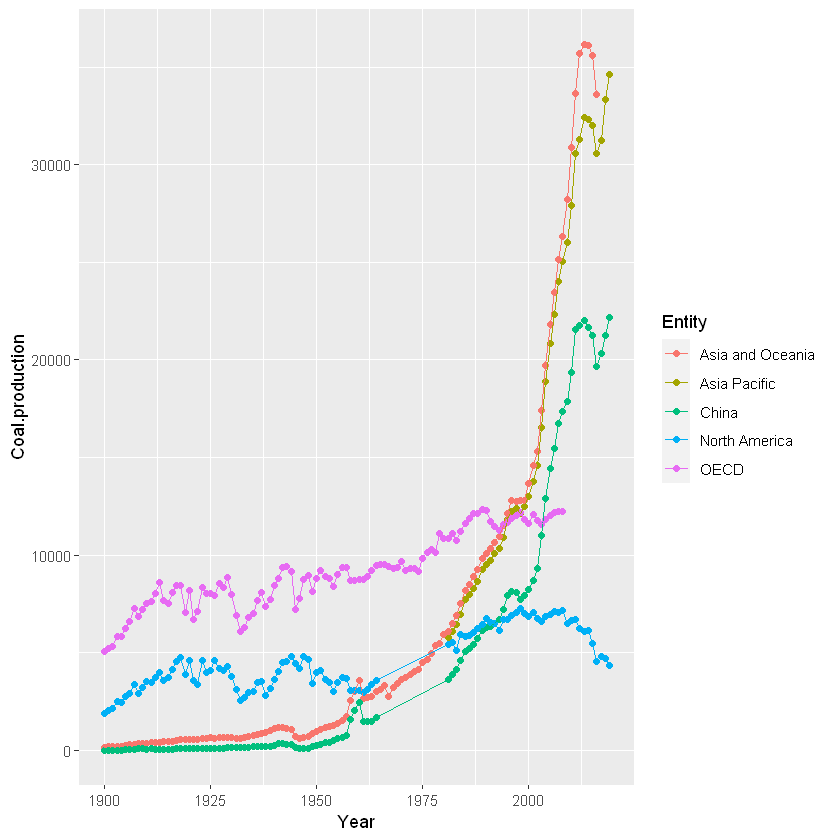

In [21]:
# Innanzitutto assegno ad un nuovo dataframe le righe di quello iniziale che corrispondono ai cinque paesi 
# che sono stati trovati come migliori produttori di carbone. 
# Posso utilizzare la funzione filter con "in" oppure direttamente un logical subsetting direttamente 
# delle righe.

# filter(coaldf, Entity %in% coal.countries)
coaldf.best.prod <- coaldf[coaldf$Entity %in% ordered.nations,]
# utilizzo quindi un dataframe nuovo per plottare per ogni paese la usa produzione di carbone negli anni
# perchè con ggplot se dovessi usare un ciclo for e rappresentare ogni volta la coal prod in funzione degli 
# anni a differenza di python l'oggetto risultante non viene graficato subito ma R lo esegue e rappresenta 
# ciò che rimane nell'ultimo ciclo 

g <- ggplot(data = coaldf.best.prod, aes(x = Year, y = Coal.production, col = Entity)) + geom_point() + geom_line()
g

Infine si chiede di rappresentare la somma cumulativa per ciascun anno rispetto ai precedenti della produzione di carbone nel mondo. Si osserva un trend crescente la cui pendenza, cioè proporzionale agli step che si aggiungono ogni anno, in questi ultimi anni tende ad un valore $\approx$ costante.

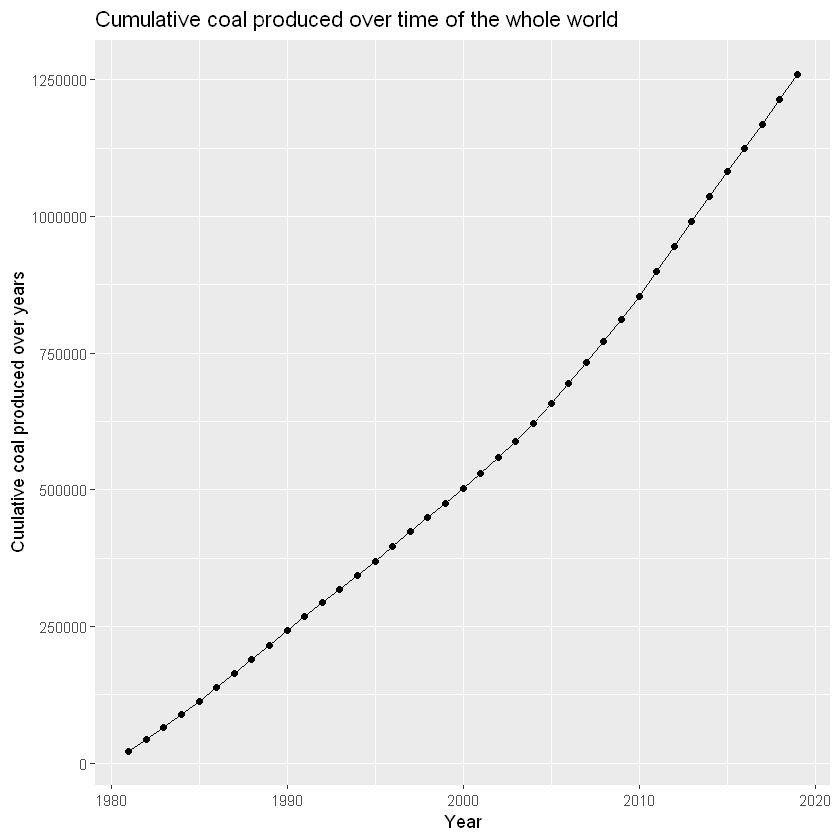

In [22]:
#coaldf.world <- coaldf[coaldf$Entity == "World",]
coaldf.world <- filter(coaldf, coaldf$Entity == "World")
coaldf.world["cumsum"] <- cumsum(coaldf.world$Coal.production)

g <- ggplot(data = coaldf.world, aes(x = Year, y = cumsum))
g <- g + geom_point()
g <- g + geom_line()
g <- g + labs(x = "Year", y = "Cuulative coal produced over years")
g <- g + ggtitle("Cumulative coal produced over time of the whole world")
g

## Exercise 4 - Covid19 vaccine data

In [23]:
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
covid.df <- read_csv(url)
head(covid.df)

# come è stato fatto fino ad ora a partire dall'url originale cambio l'ultima parte per renderlo leggibile 
# da R e assegnare i dati ad un tibble


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Chile,2020-12-24,Pfizer/BioNTech,420
Chile,2020-12-25,Pfizer/BioNTech,5198
Chile,2020-12-26,Pfizer/BioNTech,8338
Chile,2020-12-27,Pfizer/BioNTech,8649
Chile,2020-12-28,Pfizer/BioNTech,8649
Chile,2020-12-29,Pfizer/BioNTech,8649


In [24]:
covid.df.italy <- filter(covid.df, covid.df$location == "Italy")
head(covid.df.italy)

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Italy,2020-12-27,Pfizer/BioNTech,7152
Italy,2020-12-28,Pfizer/BioNTech,8573
Italy,2020-12-29,Pfizer/BioNTech,9578
Italy,2020-12-30,Pfizer/BioNTech,14304
Italy,2020-12-31,Pfizer/BioNTech,39776
Italy,2021-01-01,Pfizer/BioNTech,50827


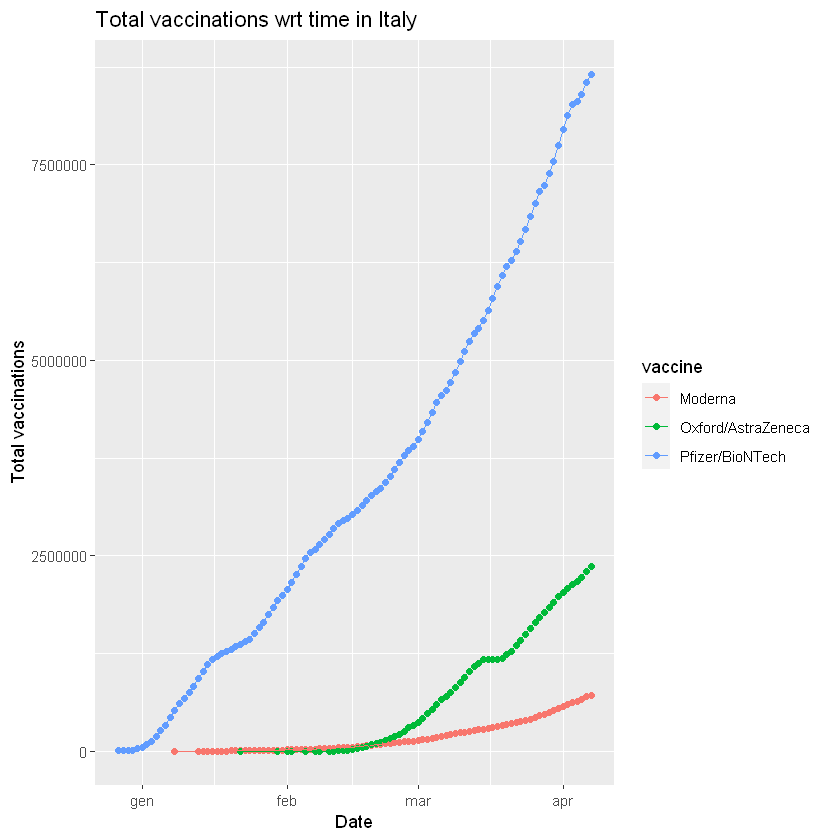

In [25]:
# per plottare il numero di vaccini al variare del tempo devo innanzitutto selezionare le tre tipologie 
# di vaccini. Utilizzo direttamente la proprietà dell'attributo "col" in ggplot2 che mi permette di 
# cambiare colore del grafico al variare di un'etichetta che scelgo in una colonna del dataframe 

g <- ggplot(data = covid.df.italy, aes(x = date, y = total_vaccinations, col = vaccine))
g <- g + geom_point()
g <- g + geom_line()
g <- g + labs(x = "Date", y = "Total vaccinations")
g <- g + ggtitle("Total vaccinations wrt time in Italy")
g


A differenza del grafico precedente adesso non si terrà conto della distinzione nelle tre case farmaceutiche che producono ad oggi il vaccino. Rappresento dunque il numero totale di vaccini somministrati al giorno in Italia.

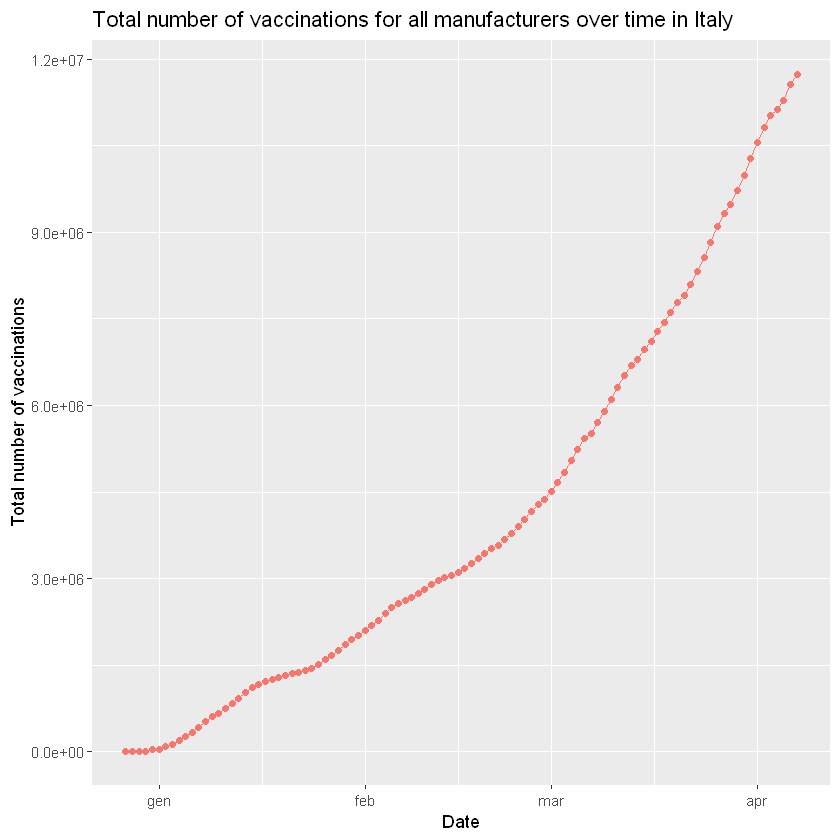

In [26]:
# per rappresentare quanto scritto sopra è necessario raggruppare il dataframe in funzione della data e 
# per ciascun giorno sommare i vaccini somministrati

plot.total.vaccinations <- function(df,nation) {
    
    # per rendere riutilizzabile questa funzione filtro innanzitutto il dataframe in funzione della 
    # nazione "nation" richiesta. Raggruppo per giorno e sommo la colonna "total_vaccinations".
    # Infine eseguo il plot tramite ggplot con punti e linee 
    
    filt <- filter(df, df$location == nation)
    aggr <- aggregate(filt$total_vaccinations, by = list(filt$date), FUN = sum)
    names(aggr) <- c("date","vaccinations")
    g <- ggplot(data = aggr, aes(x = date, y = vaccinations)) + geom_point(aes(col = "red"), show.legend = FALSE) + geom_line(aes(col = "red"), show.legend = FALSE)
    g <- g + labs(x = "Date", y = "Total number of vaccinations") + ggtitle(sprintf("Total number of vaccinations for all manufacturers over time in %s",nation))
    g
}

plot.total.vaccinations(covid.df,"Italy")

In [27]:
# ripetendo lo stesso discorso per la Germania e gli USA definisco un'ulteriore funzione che rappresenta 
# il numero di vaccini eseguiti al variare del tempo differenziando per le tre case farmaceutiche 

plot.total.vaccinations.manufacturers <- function(df,nation) {
    
    filt <- filter(df, df$location == nation)
    g <- ggplot(data = filt, aes(x = date, y = total_vaccinations, col = vaccine))
    g <- g + geom_point()
    g <- g + geom_line()
    g <- g + labs(x = "Date", y = "Total vaccinations")
    g <- g + ggtitle(sprintf("Total vaccinations wrt time in %s", nation))
    g
}

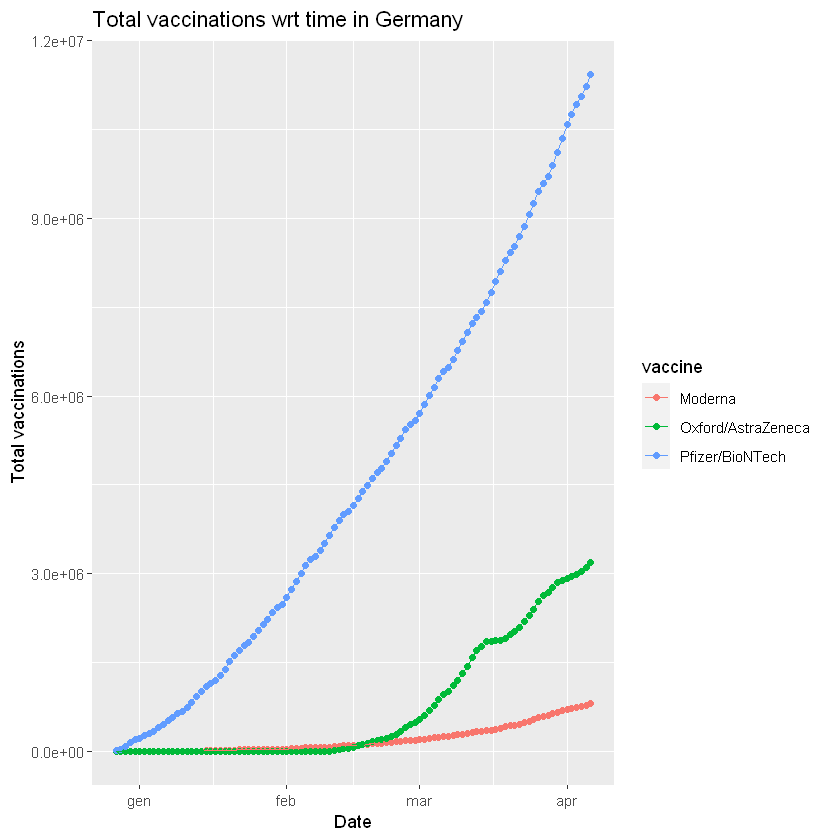

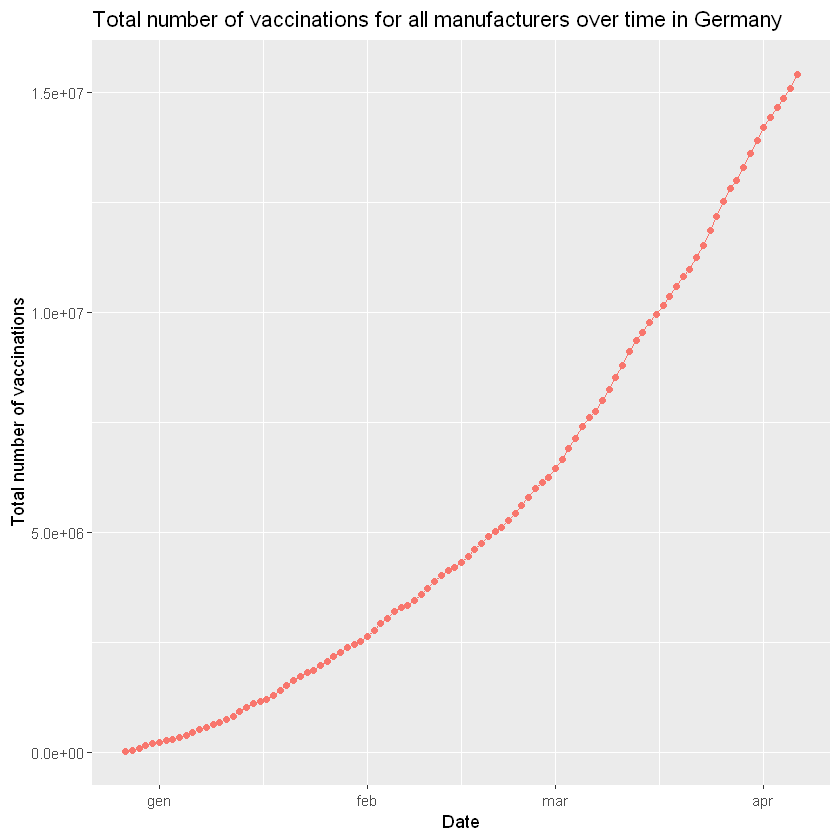

In [28]:
# Germania

plot.total.vaccinations.manufacturers(covid.df, "Germany")
plot.total.vaccinations(covid.df, "Germany")

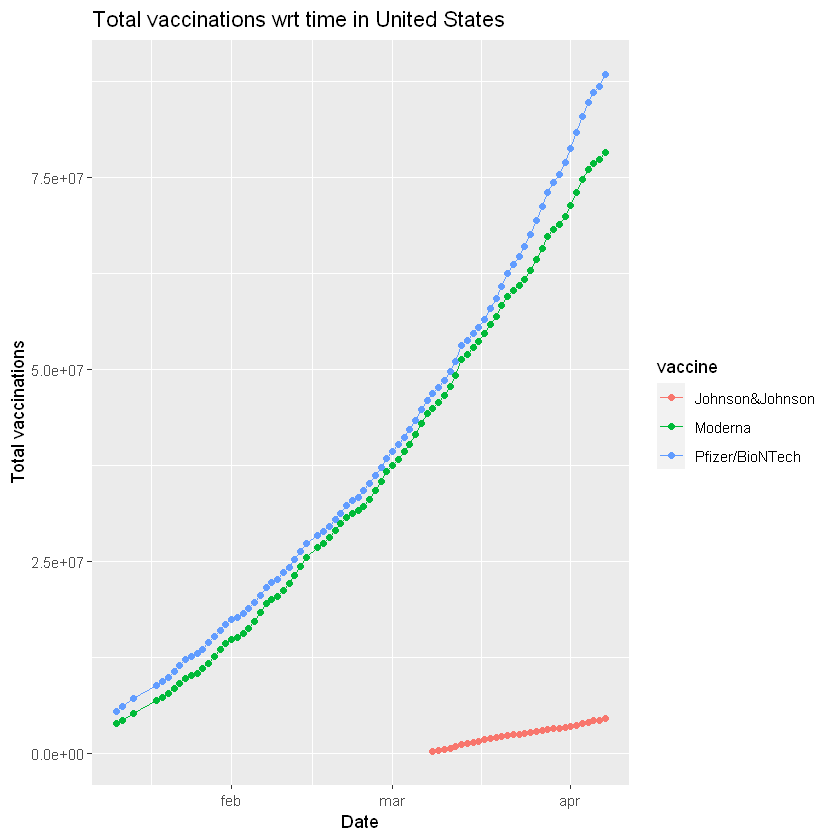

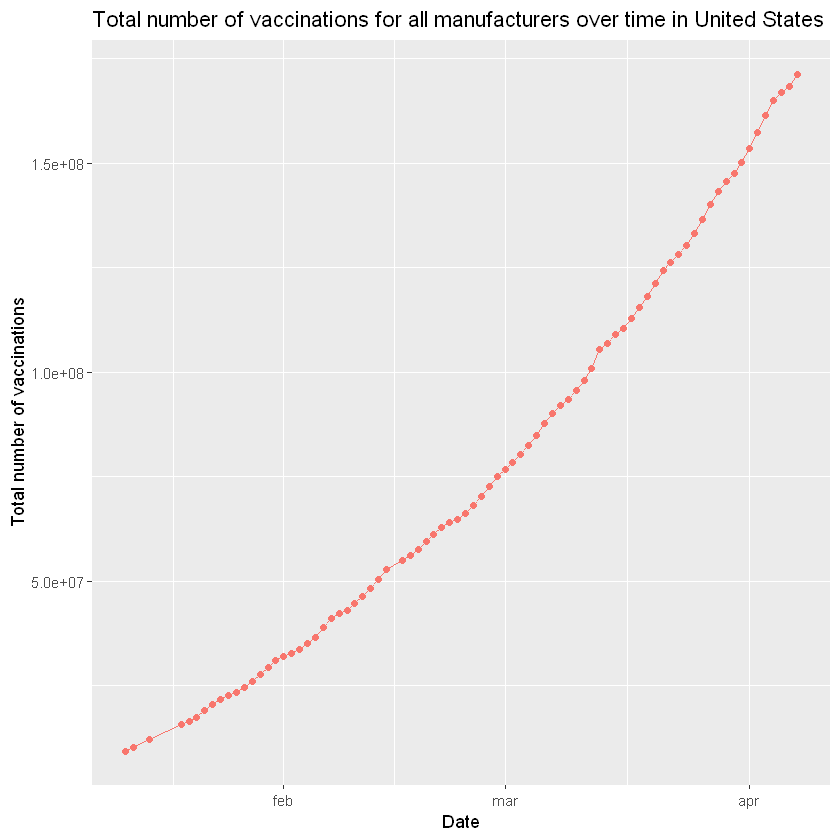

In [29]:
# USA 

plot.total.vaccinations.manufacturers(covid.df, "United States")
plot.total.vaccinations(covid.df, "United States")

#### Second part of covid19 data analysis

In [30]:
url <- "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
covid.df2 <- read_csv(url)
head(covid.df2)


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35


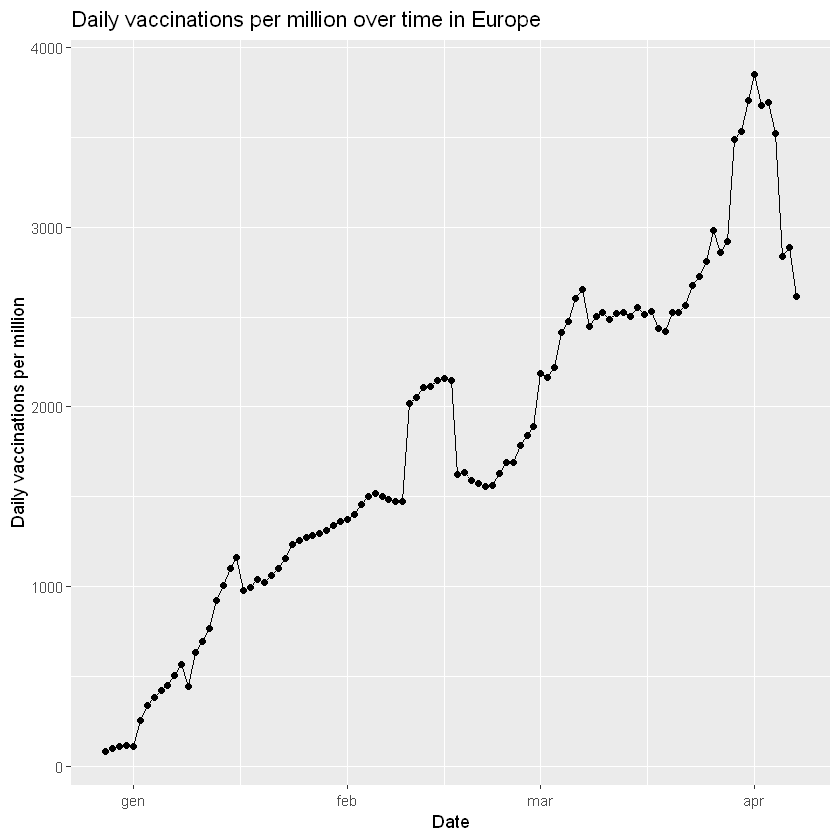

In [31]:
# per selezionare le nazioni europee filtro il dataframe come già visto precedentemente rispetto alla 
# colonna "location"

covid.df2.europe <- filter(covid.df2, covid.df2$location == "Europe")
# mi accorgo che nella colonna daily_vaccinations_per_million ci sono dei missing values quindi li elimino
g <- ggplot(data = drop_na(covid.df2.europe), aes(x = date, y = daily_vaccinations_per_million))
g <- g + geom_line() + geom_point() + labs(x = "Date", y = "Daily vaccinations per million") + ggtitle("Daily vaccinations per million over time in Europe")
g

### Analisi aggiuntiva 

Osservando il dataframe mi chiedo quale continente abbia somministrato più vaccini fino alla data ultima di raccolta dei dati nella tabella. Per fare ciò innanzitutto seleziono i vari continenti attraverso il loro "iso_code". Tramite la funzione aggregate posso raggruppare per continente (ci sono anche alcune nazioni oltre ai cinque continenti probabilmente per il loro impatto nella somministrazione dei vaccini) e sommare rispetto alla colonna total vaccinations. Questo accade perchè nel dataframe ho tante righe per ciascuna nazione quanti sono i giorni di prese dati, quindi la colonna location è costituita da diverse righe uguali. Eliminando dal dataframe i valori non disponibili (NA) ottengo come risultato una tabella con due colonne e 14 righe quante sono i continenti/nazioni nel dataframe. Rappresento tramite un barplot quanto trovato.

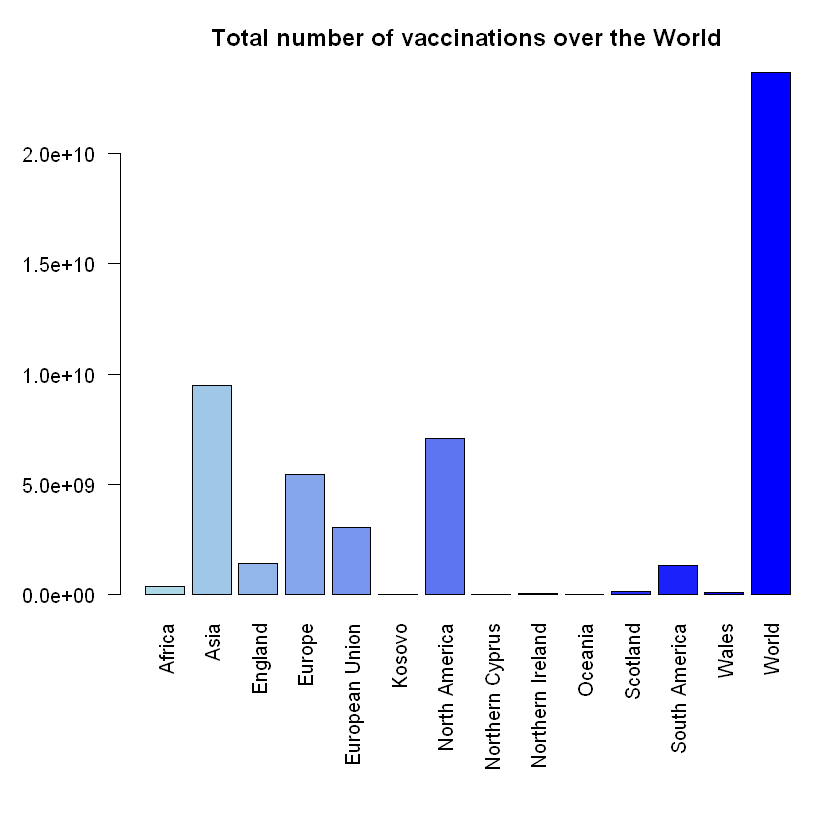

In [32]:
covid.df2.nations <- covid.df2[grepl("^OWID_.*", covid.df2$iso_code),]
# tramite regular expression chiedo al dataframe di selezionare quelle righe che cominciano esattamente 
# per OWID_ 

covid.df2.nations$total_vaccinations[is.na(covid.df2.nations$total_vaccinations)] <- 0
# poichè devo sommare sulla colonna "date" è necessario eliminare da "total_vaccinations" i NA altrimenti 
# il risultato delle operazioni che li riguarda sarebbe esattamente NA.

covid.df2.barplot <- aggregate(covid.df2.nations$total_vaccinations, by = list(covid.df2.nations$location), FUN = sum)

# per rendere il nuovo dataframe più leggibile cambio i nomi delle due colonne in location e total_vaccinations
names(covid.df2.barplot) <- c("location","total_vaccinations")

par(mar=c(10, 5, 3, 1)) 
# utile per aumentare il margine in basso al fine di far entrare i nomi anche più lunghi, inoltre definisce 
# le distanze dai quattro margini della figura.
pal <- colorRampPalette(colors = c("lightblue", "blue"))(14)
barplot(height = covid.df2.barplot$total_vaccinations , names = covid.df2.barplot$location, las=2, col = pal)
# l'opzione "las" mi permette di posizionare le eitchette perpendicolarmente al barplot in basso
title("Total number of vaccinations over the World")